<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20Elephant%20segmentation%20in%20the%20wild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to detect elephants in images



## 3. How to train a custom detector using coco dataset

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/21_maskrcnn/installation
     
 - Select the right file and run
 
     - chmod +x install.sh && ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
! cd Monk_Object_Detection/21_maskrcnn/installation && chmod +x install.sh && ./install.sh

# Use already trained model for demo

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/21_maskrcnn/lib")

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kCBA_U1jVhE9f1Xff3ZiuCV5ZTE3Hstn' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kCBA_U1jVhE9f1Xff3ZiuCV5ZTE3Hstn" -O seg_elephant_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq seg_elephant_trained.zip

In [4]:
config_file = 'work_dirs/config_updated/config_updated.py'
checkpoint_file = 'work_dirs/config_updated//latest.pth'

gtf.Model_Params(config_file, checkpoint_file, use_gpu=True)

In [5]:
ls work_dirs/test

1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg  8.jpg


Inference Time: 0.0997762680053711 sec
Saving Time: 0.026106834411621094 sec


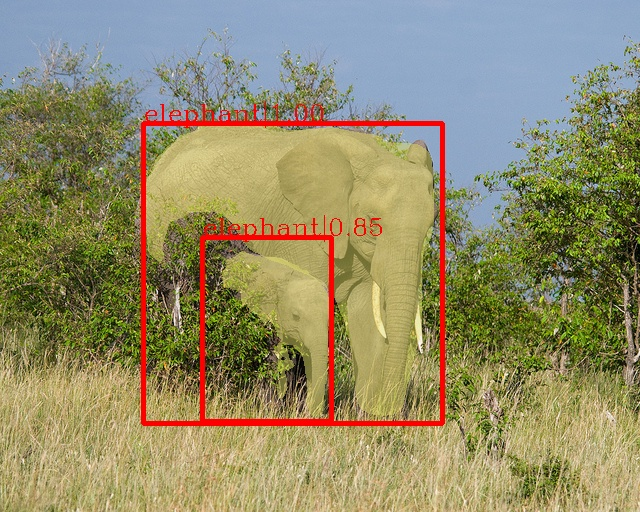

In [6]:
result = gtf.Predict(img_path="work_dirs/test/1.jpg",
                        out_img_path="result.jpg",
                        thickness=3,
                        font_scale=0.8,
                        thresh=0.6)

from IPython.display import Image
Image(filename='result.jpg') 

Inference Time: 0.0786280632019043 sec
Saving Time: 0.023906946182250977 sec


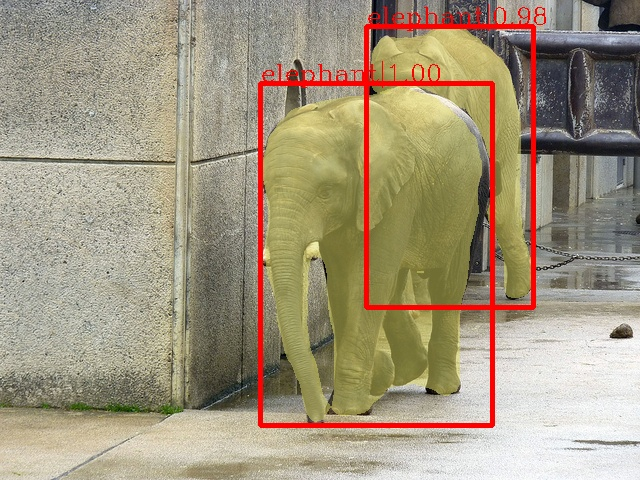

In [7]:
result = gtf.Predict(img_path="work_dirs/test/2.jpg",
                        out_img_path="result.jpg",
                        thickness=3,
                        font_scale=0.8,
                        thresh=0.6)

from IPython.display import Image
Image(filename='result.jpg') 

# Training on your own dataset
 - Dataset credits: https://cocodataset.org/#download

# COCO Format

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---ImagesVal (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------instances_ImagesVal.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

## Get more details on how to convert your dataset to coco instance segmentation format
 - https://patrickwasp.com/create-your-own-coco-style-dataset/
 - https://towardsdatascience.com/master-the-coco-dataset-for-semantic-image-segmentation-part-1-of-2-732712631047
 - https://github.com/adions025/XMLtoJson_Mask_RCNN
 - https://www.dlology.com/blog/how-to-create-custom-coco-data-set-for-instance-segmentation/

# For this example we use elephants subset from COCO API datasets

## Direct download the subset from here

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1F-JzAv35lZPTv6UmBGlvY82FKZ7QskHL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1F-JzAv35lZPTv6UmBGlvY82FKZ7QskHL" -O obj_thermal_soccer_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq dataset_elephant_coco.zip

## This is how subset was created

In [ ]:
! wget http://images.cocodataset.org/zips/train2014.zip

! wget http://images.cocodataset.org/zips/val2014.zip
    
! wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
    
! unzip -qq train2014.zip

! unzip -qq val2014.zip

! unzip -qq annotations_trainval2014.zip

! mkdir elephant

! mkdir elephant/train
! mkdir elephant/train/images
! mkdir elephant/val
! mkdir elephant/val/images

In [ ]:
import json
import os
from tqdm import tqdm

with open('annotations/instances_train2014.json') as f:
    data = json.load(f)
    
elephant_data = {};
elephant_data["info"] = data["info"]
elephant_data["licenses"] = data["licenses"]
elephant_data["categories"] = [{'supercategory': 'animal', 'id': 1, 'name': 'elephant'}]
elephant_data["images"] = [];
elephant_data["annotations"] = [];

image_ids = [];

from tqdm import tqdm
for i in tqdm(range(len(data["annotations"]))):
    if(data["annotations"][i]["category_id"] == 22):
        data["annotations"][i]["category_id"] = 1;
        elephant_data["annotations"].append(data["annotations"][i])
        image_ids.append(data["annotations"][i]["image_id"])
        
from tqdm import tqdm
for i in tqdm(range(len(data["images"]))):
    if(data["images"][i]["id"] in image_ids):
        elephant_data["images"].append(data["images"][i])
        os.system("cp train2014/" + data["images"][i]['file_name'] + " elephant/train/images/")
        

with open('elephant/train/instances_train.json', 'w') as json_file:
    json.dump(elephant_data, json_file)

In [ ]:
import json
import os
from tqdm import tqdm

with open('annotations/instances_val2014.json') as f:
    data = json.load(f)
    
elephant_data = {};
elephant_data["info"] = data["info"]
elephant_data["licenses"] = data["licenses"]
elephant_data["categories"] = [{'supercategory': 'animal', 'id': 1, 'name': 'elephant'}]
elephant_data["images"] = [];
elephant_data["annotations"] = [];

image_ids = [];

from tqdm import tqdm
for i in tqdm(range(len(data["annotations"]))):
    if(data["annotations"][i]["category_id"] == 22):
        data["annotations"][i]["category_id"] = 1;
        elephant_data["annotations"].append(data["annotations"][i])
        image_ids.append(data["annotations"][i]["image_id"])
        
from tqdm import tqdm
for i in tqdm(range(len(data["images"]))):
    if(data["images"][i]["id"] in image_ids):
        elephant_data["images"].append(data["images"][i])
        os.system("cp val2014/" + data["images"][i]['file_name'] + " elephant/val/images/")
        

with open('elephant/val/instances_val.json', 'w') as json_file:
    json.dump(elephant_data, json_file)

# Training

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/21_maskrcnn/lib/")

In [ ]:
from train_engine import Detector

In [ ]:
gtf = Detector();

In [ ]:
img_folder = "elephant/train/images"
anno_file = "elephant/train/instances_train.json"
class_file = "elephant/classes.txt"

gtf.Train_Dataset(img_folder, anno_file, class_file)

In [ ]:
gtf.system_dict["params"]["classes"]

In [ ]:
img_folder = "elephant/val/images"
anno_file = "elephant/val/instances_val.json"

gtf.Val_Dataset(img_folder, anno_file)

In [ ]:
gtf.Dataset_Params(batch_size=2, num_workers=2)

In [ ]:
gtf.List_Models();

In [ ]:
gtf.Model_Params(model_name="mask_rcnn_r50_fpn", gpu_devices=[0])

In [ ]:
gtf.Hyper_Params(lr=0.001, momentum=0.9, weight_decay=0.0001);

In [ ]:
gtf.Training_Params(num_epochs=2, val_interval=1);

In [ ]:
gtf.Train();

# Inference

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/21_maskrcnn/lib")

In [ ]:
from infer_engine import Infer

In [ ]:
gtf = Infer();

In [ ]:
config_file = 'work_dirs/config_updated/config_updated.py'
checkpoint_file = 'work_dirs/config_updated//latest.pth'

gtf.Model_Params(config_file, checkpoint_file, use_gpu=True)

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000458311.jpg",
                        out_img_path="result.jpg",
                        thickness=3,
                        font_scale=0.8,
                thresh=0.6)

from IPython.display import Image
Image(filename='result.jpg') 

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000096354.jpg",
                        out_img_path="result.jpg",
                        thickness=2,
                        font_scale=0.5,
                thresh=0.6)

from IPython.display import Image
Image(filename='result.jpg') 

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000101959.jpg",
                out_img_path="result.jpg",
                     thickness=2,
                        font_scale=0.5,
                thresh=0.3)

from IPython.display import Image
Image(filename='result.jpg')

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000066800.jpg",
                out_img_path="result.jpg",
                     thickness=2,
                        font_scale=0.5,
                thresh=0.3)

from IPython.display import Image
Image(filename='result.jpg')

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000108864.jpg",
                out_img_path="result.jpg",
                     thickness=2,
                        font_scale=0.5,
                thresh=0.3)

from IPython.display import Image
Image(filename='result.jpg')

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000349896.jpg",
                out_img_path="result.jpg",
                     thickness=2,
                        font_scale=0.5,
                thresh=0.6)

from IPython.display import Image
Image(filename='result.jpg')

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000259625.jpg",
                out_img_path="result.jpg",
                     thickness=2,
                        font_scale=0.5,
                thresh=0.3)

from IPython.display import Image
Image(filename='result.jpg')

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000097610.jpg",
                out_img_path="result.jpg",
                     thickness=2,
                        font_scale=0.5,
                thresh=0.8)

from IPython.display import Image
Image(filename='result.jpg')

In [ ]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000094852.jpg",
                out_img_path="result.jpg",
                     thickness=2,
                        font_scale=0.5,
                thresh=0.8)

from IPython.display import Image
Image(filename='result.jpg')